
 Sample Data:
    UserID  Month  UnitsConsumed  AvgMonthlyUsage  IsFraud
0       1      1     282.879461              302        0
1       1      2     307.849750              302        0
2       1      3     277.838485              302        0
3       1      4     291.956000              302        0
4       1      5     311.113664              302        0

 Confusion Matrix:
 [[2938    0]
 [   0   62]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2938
           1       1.00      1.00      1.00        62

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



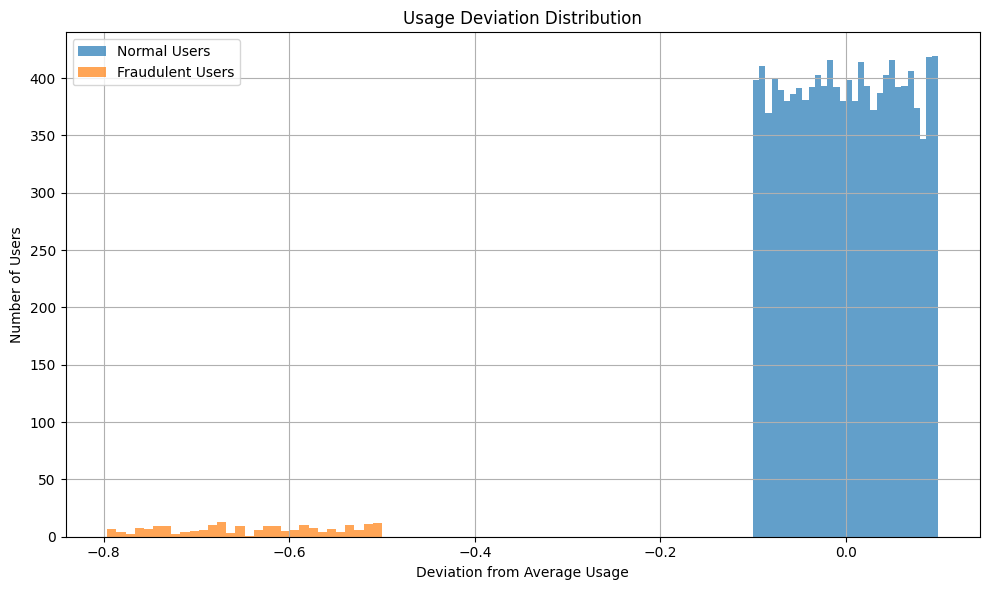

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

np.random.seed(42)
n_users=1000
n_months=12
records=[]
for user_id in range(1,n_users+1):
     avg_units = np.random.randint(200, 800) 
     for month in range(1,n_months+1):
        is_fraud=0
        if np.random.rand()<0.1 and month in [6,11]:
            units=avg_units*np.random.uniform(0.2,0.5)
            is_fraud=1
        else:
            units=avg_units*np.random.uniform(0.9,1.1)
        records.append([user_id,month,units,avg_units,is_fraud])
df=pd.DataFrame(records,columns=["UserID","Month","UnitsConsumed","AvgMonthlyUsage","IsFraud"])  
print("\n Sample Data:\n",df.head())
df['UsageDeviation']=(df['UnitsConsumed']-df['AvgMonthlyUsage'])/df['AvgMonthlyUsage']
X=df[["UnitsConsumed","AvgMonthlyUsage","UsageDeviation"]]
y=df["IsFraud"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))
plt.figure(figsize=(10,6))
plt.hist(df[df['IsFraud']==0]['UsageDeviation'],bins=30,alpha=0.7,label='Normal Users')
plt.hist(df[df['IsFraud'] == 1]['UsageDeviation'], bins=30, alpha=0.7, label='Fraudulent Users')
plt.title("Usage Deviation Distribution")
plt.xlabel('Deviation from Average Usage')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

